# Exercícios - Estatística II

### Questão 1

Uma relação bem importante entre uma população e uma amostra, é que uma amostra pode ser significativa daquela população (ou seja, podemos inferir que a média e variância da amostra será bem próximo do valor real da população), isto quando essa amostra for grande o suficiente para isso. Vamos fazer algumas simulações utilizando o _Python_ para testar esses conceicos, resolvendo os itens a seguir:

__A)__ Crie uma lista com número aleatórios entre 20 e 50 e que essa lista contenham 1 milhão de elementos;

__B)__ Calcule a média e a variância para essa lista;

__C)__ Faça amostra aleatórias de diversos tamanhos (10, 100, 1.000 e 10.000 elementos) e calcule as mesmas métricas que o item anterior, para avaliar o conceito proposto no enunciado

In [61]:
import numpy as np
import pandas as pd
import random

In [ ]:
def cria_lista(n):
  lista = []
  for numero in range(n):
    num = random.randint(20,50)
    lista.append(num)
  return lista

In [ ]:
lista = cria_lista(1000000)

In [ ]:
media = np.round(np.mean(lista),2)
variancia = np.round(np.var(lista),2)
media, variancia


(34.99, 80.03)

In [44]:
def samples(pop, n):
  sample = list(random.sample(pop,n))
  s_mean = np.round(np.mean(sample),2)
  s_variance = np.round(np.var(sample),2)
  return s_mean, s_variance

In [ ]:
samples(lista, 10)

(31.5, 66.25)

In [ ]:
samples(lista, 100)

(35.33, 85.76)

In [ ]:
samples(lista, 1000)

(35.19, 80.48)

In [ ]:
samples(lista, 10000)

(35.0, 81.11)

### Questão 2

Neste exercício vamos demonstrar a importância de uma amostragem estratificada quando temos grupos significantes dentro da população. Faça os seguintes itens:

__A)__ Crie 3 listas de números aleatórios sendo elas:
    - uma lista com números aleatórios entre 40 e 50 contendo 10.000 elementos;
    - uma lista com números aleatórios entre 10 e 20 contendo 6.000 elementos;
    - uma lista com números aleatórios entre 80 e 90 contendo 4.000 elementos.
    
__B)__ Calcule a média e a variância para cada uma das 3 listas;

__C)__ Calcule a média e a variância para a população, onde a população seja as 3 listas juntas;

__Dica.:__ Neste caso, temos que trabalhar com média e variância ponderada!

__D)__ Una as 3 listas em uma só e retire uma amostra de 1% da lista resultante. Calcule a média e a variância para esta amostra;

__E)__ Por fim, faça uma amostra estratificada da seguinte forma: faça uma amostra aleatória de 1% de cada uma das 3 listas e em seguida calcule a média e a variância para a amostra estratificada (será necessário utilizar a média e variância ponderada!).

__F)__ Compare o resultado das métricas para a amostra e a amostra estratificada com o valor das métricas da população.

In [7]:
def cria_lista2(n,i,f):
  lista = []
  for numero in range(n):
    num = random.randint(i,f)
    lista.append(num)
  return lista

def med_var(lista):
  l_mean = np.round(np.mean(lista),2)
  l_variance = np.round(np.var(lista),2)
  return l_mean, l_variance

In [3]:
lista1 = cria_lista2(10000,40,50)

In [4]:
lista2 = cria_lista2(6000,10,20)

In [5]:
lista3 = cria_lista2(4000,80,90)

In [8]:
print(f'Média e variância para lista 1: {med_var(lista1)}\nMédia e variância para lista 2: {med_var(lista2)}\nMédia e variância para lista 3: {med_var(lista3)}')

Média e variância para lista 1: (45.01, 10.01)
Média e variância para lista 2: (14.93, 10.1)
Média e variância para lista 3: (84.99, 9.95)


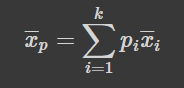

In [20]:
media_pond = [(len(lista1)/(len(lista1)+len(lista2)+len(lista3)))*(np.mean(lista1)) + (len(lista2)/(len(lista1)+len(lista2)+len(lista3)))*(np.mean(lista2)) + (len(lista3)/(len(lista1)+len(lista2)+len(lista3)))*(np.mean(lista3))]
media_pond

[43.9812]

In [38]:
def media_pond(*args):
  mediapond = 0
  N = 0
  for arg in args:
    N += len(arg)
  for arg in args:
    pi = (len(arg)/N)
    media = pi * (np.mean(arg))
    mediapond += media
  return mediapond

In [41]:
media_pond(lista1,lista2,lista3)

43.9812

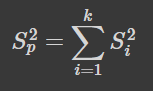

In [39]:
def var_pond(*args):
  varpond = 0
  for arg in args:
    varpond += np.var(arg)
  return np.round(varpond,2)

In [40]:
var_pond(lista1,lista2,lista3)

30.06

In [42]:
lista4 = lista1 + lista2 + lista3
len(lista4)

20000

In [55]:
def samples_lista(pop, n):
  sample = list(random.sample(pop,n))
  return sample

In [46]:
# D) amostra contendo 1% da população, média e variancia da lista concatenada
n = int(len(lista4)*0.01)
samples(lista4, n)

(44.84, 658.12)

In [56]:
# E) Amostra de 1% para cada uma das listas
# Lista 1:
n = int(len(lista1)*0.01)
s_one = samples_lista(lista1, n)
med_var(s_one)

(44.98, 10.36)

In [57]:
# Lista 2:
n = int(len(lista2)*0.01)
s_two = samples_lista(lista2, n)
med_var(s_two)

(14.5, 10.32)

In [58]:
# Lista 3:
n = int(len(lista3)*0.01)
s_three = samples_lista(lista3, n)
med_var(s_three)

(84.92, 11.42)

In [59]:
# Media e variancia ponderadas estratificadas
media_pond(s_one, s_two, s_three)

43.824999999999996

In [60]:
var_pond(s_one, s_two, s_three)

32.1

F) Comparar os valores

A média e variancia ponderadas utilizando a estratificação se aproximam muito mais dos valores encontrados do que a amostra de 1% das três listas unidas em uma só.

### Questão 3

 Uma máquina de sorvete está regulada de modo a servir uma média de 120g por casquinha. Se a quantidade servida por casquinha seguir uma distribuição normal com desvio padrão de 18g, determine a porcentagem de casquinhas que conterão mais de 150g de sorvete.

In [62]:
import scipy.stats as st

In [69]:
media = 120
desv_pop = 18
x = 150

z = (x - media) / desv_pop
print((1 - (st.norm.cdf(z)))*100, '%')


4.77903522728147 %


### Questão 4

O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 71 Kg e o desvio padrão é 5,3 Kg. Admitindo que os pesos são normalmente distribuídos, determine a oercentagem de estudantes que pesam entre 65 e 72,5 kg

In [70]:
mu = 71
sigma = 5.3
x0 = 65
x1 = 72.5

z0 = (x0 - mu)/sigma
z1 = (x1 - mu)/sigma

p0 = st.norm.cdf(z0)*100
p1 = st.norm.cdf(z1)*100

p = p1 - p0
print(round(p,2),'%')

48.26 %


### Questão 5

Uma fábrica anuncia que o índice de cafeína em um refrigerante de uma dada marca é igual a 20 mg por lata. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de cafeína do refrigerante dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

In [73]:
mu = 20 #Hipotese 0, H0 = 20
amostra = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]
n = len(amostra)
sigma2 = 4
sigma = np.sqrt(sigma2)
significancia = 0.05
confianca = 0.95

# valor de z:
z = st.norm.ppf(confianca)
print(z)

# valor de x critico (xc):
# z = xc - mu / sigma/raiz(n)

xc = z*(sigma/np.sqrt(n)) + mu
print(xc)

# média do xcrit:

xobs = np.mean(amostra)
print(xobs)


1.6448536269514722
20.735600904580114
20.45


Sim, pode-se aceitar a afirmação, uma vez que a média amostral está dentro do limite de confiança estipulado, sendo menor do que o x critico para 95% de confiança